# Visualizing AQI during the 2017 Thomas Fire in Santa Barbara County

Author: Marina Kochuten

Repository: https://github.com/marinakochuten/thomas-fire-analysis

## About

In this notebook, I use Air Quality Index (AQI) data from the US Environmental Protection Agency to visualize the impact on the AQI of the 2017 Thomas Fire. The Thomas Fire, which burned across Santa Barbara and Ventura counties in December 2017, has been one of California’s largest wildfires, devastating over 280,000 acres of land, destroying wildlife habitats, and leading to soil erosion and increased flood risks in the region.

## Highlights

- date and string data wrangling
- combining multiple data frames
- visualizing time series

## About the data

**Air Quality Index (AQI):** The EPA's AirData tool has pre-generated files of data available for download. The files are updated twice per year: once in June to capture the complete data for the prior year and once in December to capture the data for the summer. AQI is calculated each day for each monitor for the Criteria Gases and PM10 and PM2.5. For this analysis, I use two files, one containing daily AQI data for 2017 and one for 2018.

- *Citation:* Environmental Protection Agency AirData (2024), Daily AQI by County [Data Set] Available from: https://www.epa.gov/outdoor-air-quality-data/download-daily-data. Access date: October 20, 2024.

## Workflow

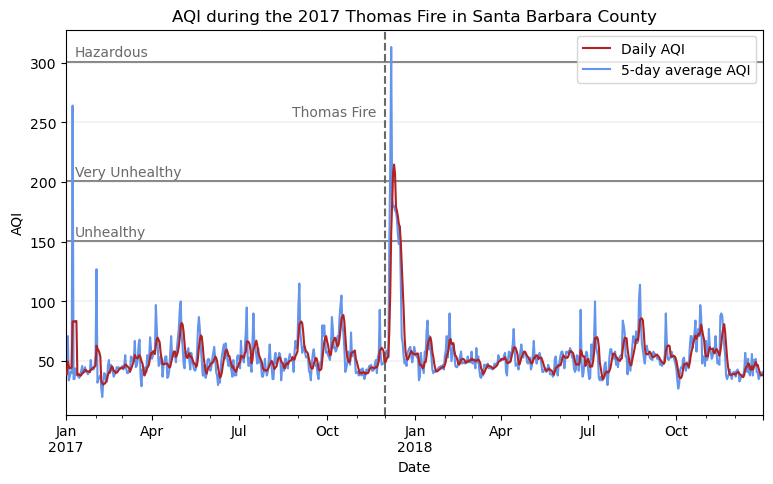

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Load in county level AQI data from 2017 and 2018
aqi = pd.concat([pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2017.zip'),
                 pd.read_csv('https://aqs.epa.gov/aqsweb/airdata/daily_aqi_by_county_2018.zip')])

# Convert column names to lower snake case
aqi.columns = (aqi.columns
                  .str.lower()
                  .str.replace(' ','_'))

# Make new data frame containing only AQI data for Santa Barbara County
aqi_sb = ((aqi[aqi['county_name'] == "Santa Barbara"])
          .drop(columns = ['state_name', 'county_name', 'state_code', 'county_code'])
         )

# Convert date column to datetime object and set as the index
aqi_sb.date = pd.to_datetime(aqi_sb.date)
aqi_sb = aqi_sb.set_index('date')

# Add new column containing a rolling 5-day AQI average
aqi_sb['five_day_average'] = aqi_sb['aqi'].rolling(window = '5D').mean()

# Plot daily AQI against 5-day average ----

# Initialize figure
fig, ax = plt.subplots(figsize=(9,5))

# Add daily and 5-day average AQI
aqi_sb.five_day_average.plot(ax=ax, color = 'firebrick', zorder = 3)
aqi_sb.aqi.plot(ax=ax, color = 'cornflowerblue', zorder = 2)

# Add AQI labels for unhealthy levels
ax.axhspan(150, 151.5, facecolor = "dimgrey", alpha = 0.8)
ax.text(x = pd.to_datetime('2017-01-10'), y = 155, s = 'Unhealthy', color = 'dimgrey')
ax.axhspan(200, 202, facecolor = "dimgrey", alpha = 0.8)
ax.text(x = pd.to_datetime('2017-01-10'), y = 205, s = 'Very Unhealthy', color = 'dimgrey')
ax.axhspan(300, 301, facecolor = "dimgrey", alpha = 0.8)
ax.text(x = pd.to_datetime('2017-01-10'), y = 305, s = 'Hazardous', color = 'dimgrey')

# Update axis labels and title
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('AQI during the 2017 Thomas Fire in Santa Barbara County')

# Add legend
ax.legend(labels = ['Daily AQI', '5-day average AQI'])

# Add label indicating the Thomas Fire
ax.axvline(x = pd.to_datetime('2017-12-01'), color = 'dimgrey', linestyle = 'dashed')
ax.text(x = pd.to_datetime('2017-08-25'), y = 255, s = 'Thomas Fire', color = 'dimgrey')

# Update grid lines
ax.grid(axis = 'y', linewidth = 0.2)

plt.show()